In [81]:
import torch
import matplotlib.pyplot as plt
class LIF(torch.nn.Module):
    def __init__(self, v_rest=0, v_thr=1):
        super(LIF, self).__init__()
        self.tau = 20
        self.v_thr = v_thr
        self.v_rest = v_rest
        self.dt = 0.1
        self.v = v_rest
        self.thr_rest = self.v_thr - self.v_rest
        self.w_in = torch.nn.Parameter(torch.randn(10, 1) * self.thr_rest)
        self.w_rec = torch.nn.Parameter(torch.randn(10, 10) * self.thr_rest)

    def spike(self, x):
        forward = (x > 0).float()
        backward = torch.where(
            x > 0, -0.5 * torch.square(x - 1), 0.5 * torch.square(x + 1)
        )
        backward = torch.where(torch.abs(x) < 1, backward, torch.zeros_like(x))
        return (forward - backward).detach() + backward

    def forward(self, x, state):
        T = x.shape[0]
        z = state[0]
        v = state[1]
        ztotal, vtotal = [], []
        for i in range(T-1):
            inp_cur = self.w_in @ x[i]
            rec_cur = (self.w_rec @ z)
            v = (
                v * (1 - self.dt / self.tau)
                + (inp_cur + rec_cur + self.v_rest) * self.dt / self.tau
            )
            z = self.spike((v - self.v_thr)/self.thr_rest)
            v = v - z * self.thr_rest
            ztotal.append(z)
            vtotal.append(v)
        z = torch.stack(ztotal)
        v = torch.stack(vtotal)    
        return z,v 



In [82]:
x = torch.zeros(10000, 1)
zd = torch.ones(99, 10) * 0.1
torch.manual_seed(0)
l = LIF(v_rest=-75, v_thr=-50)
x[10:11] = 1 / l.dt

w = l.w_rec.clone().detach()
optimizer = torch.optim.AdamW(l.parameters(), lr=0.01)

z, v = l(x, (torch.zeros(10), torch.zeros(10)+l.v_rest))
# loss = torch.square(z - zd).mean()
# l.w_rec.data /= 250
# l.w_in.data /= 250

# loss.backward()
# optimizer.step()

# print((w - l.w_rec*250)/250)

# print(w - l.w_rec)
# c=l.w_in.grad
# d = l.w_rec.grad
# # print(c,d)

(tensor([1.9262], grad_fn=<DivBackward0>),
 tensor(1.9262, grad_fn=<SubBackward0>),
 tensor(390.7836, grad_fn=<SumBackward0>))

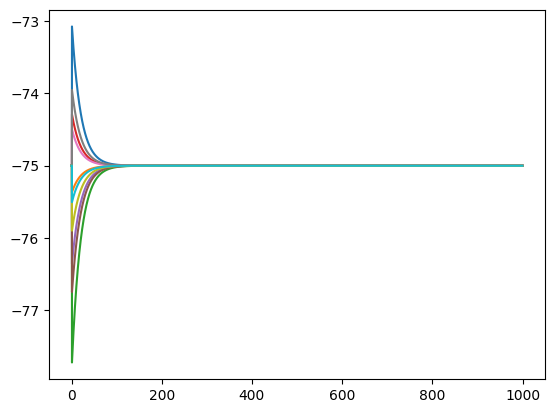

In [83]:
t = torch.arange(v.shape[0])*l.dt
v = v[t<1000]
t = t[t<1000]
plt.plot(t, v.detach())

l.w_in[0] / 20, v[:,0].max() - l.v_rest, (v[:,0] + 75).sum()

(tensor([1.9262], grad_fn=<DivBackward0>),
 tensor(1.9262, grad_fn=<SubBackward0>),
 tensor(38.5993, grad_fn=<SumBackward0>))

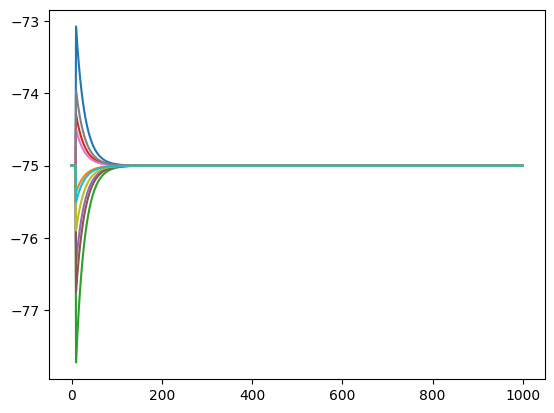

In [80]:
t = torch.arange(v.shape[0])*l.dt
v = v[t<1000]
t = t[t<1000]
plt.plot(t, v.detach())

l.w_in[0] / 20, v[:,0].max() - l.v_rest, (v[:,0] + 75).sum()

In [222]:
x = torch.zeros(100, 1)
x[10:30] = 2
zd = torch.ones(99, 10) * 0.1
torch.manual_seed(0)
l = LIF(v_rest=0, v_thr=0.1)
w = l.w_rec.clone().detach()
# l.w_rec.register_hook(lambda grad: grad / 25)
optimizer = torch.optim.AdamW(l.parameters(), lr=0.01)
z, v = l(x, (torch.zeros(10), torch.zeros(10)+l.v_rest))
loss = torch.square(z - zd).mean()
loss.backward()
optimizer.step()

print((w - l.w_rec))
# a = l.w_in.grad / 25
# b = l.w_rec.grad / 25
print(l.w_rec.grad)

tensor([[-9.9935e-03, -1.5557e-05, -3.4124e-06,  1.8537e-05,  4.6827e-06,
         -1.5777e-06,  1.4439e-05, -9.9963e-03,  1.3903e-05,  1.5870e-05],
        [ 9.4622e-06, -8.4415e-06,  9.3207e-06,  1.2591e-05,  2.0057e-05,
          5.3737e-07,  4.3958e-06,  1.1241e-06,  6.4075e-06,  4.4107e-06],
        [-2.1588e-06, -7.4282e-06,  5.6289e-06,  2.5965e-06,  5.2303e-06,
          2.3022e-05, -1.4693e-05, -1.5870e-05,  1.2033e-05,  8.4564e-07],
        [-1.0011e-02, -4.7876e-08, -2.3041e-06, -3.9190e-06,  5.4352e-06,
         -3.9525e-06,  2.0564e-06, -1.0004e-02, -5.7332e-06, -5.5544e-06],
        [-1.5318e-05, -1.2346e-05,  1.8194e-05, -5.5172e-06, -1.3262e-05,
          1.8850e-06, -6.9104e-07, -4.9509e-06, -1.4782e-05,  2.5690e-05],
        [-4.7311e-06,  3.3565e-06,  1.5095e-05,  2.0817e-05,  1.7077e-05,
          2.3812e-05, -1.0669e-05,  1.1154e-05, -1.4072e-06,  8.0615e-06],
        [-9.9962e-03, -7.6070e-06, -1.5989e-05,  1.8487e-07,  8.4192e-06,
         -4.0010e-06,  1.0394e-0

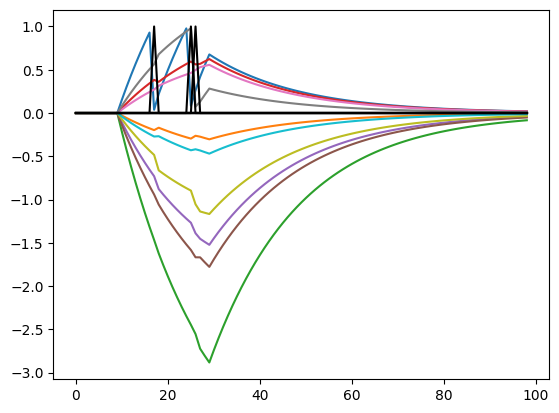

In [180]:
plt.plot(v.detach())
plt.plot(z.detach(), "black")

In [181]:
a/c

tensor([[25.0004],
        [    nan],
        [    nan],
        [25.0000],
        [    nan],
        [    nan],
        [25.0000],
        [25.0000],
        [    nan],
        [    nan]])